In [29]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [30]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=528159831f5cec81bcc735cc79d4424a


In [31]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))
lat_lngs

[(-71.40243028505189, 128.9920975775695),
 (-51.06684671346811, -70.31590442163072),
 (-8.161609761294557, -175.9995437543482),
 (-13.518642147474267, 167.7797867561851),
 (-28.750919878328126, 18.649300801562248),
 (-3.5765834757526846, -135.53953516439253),
 (-34.208034384157024, 36.08776264890943),
 (46.19376452844017, -149.00332491237836),
 (16.60242969996338, 127.29640109239142),
 (-88.84895009593023, -40.80044333160777),
 (21.08509279600321, -145.98874091433592),
 (31.813188471007877, -65.79204595480252),
 (-23.93905656940987, -16.277702102006884),
 (-67.84130212219915, -111.52809425157065),
 (84.18350376626611, 136.26438969121415),
 (46.64306002646387, 48.56428458615204),
 (4.679307259308956, -70.74273639865795),
 (12.66654417606108, -5.402603961788799),
 (-44.197135276825456, 74.30727867373017),
 (-62.57968825244591, -39.35821338948756),
 (-14.586224250838285, -94.89846263995418),
 (-77.06433676135606, -10.250713063966089),
 (26.90931661124479, 9.478193953126464),
 (-35.7631795

In [32]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates


[(-71.40243028505189, 128.9920975775695),
 (-51.06684671346811, -70.31590442163072),
 (-8.161609761294557, -175.9995437543482),
 (-13.518642147474267, 167.7797867561851),
 (-28.750919878328126, 18.649300801562248),
 (-3.5765834757526846, -135.53953516439253),
 (-34.208034384157024, 36.08776264890943),
 (46.19376452844017, -149.00332491237836),
 (16.60242969996338, 127.29640109239142),
 (-88.84895009593023, -40.80044333160777),
 (21.08509279600321, -145.98874091433592),
 (31.813188471007877, -65.79204595480252),
 (-23.93905656940987, -16.277702102006884),
 (-67.84130212219915, -111.52809425157065),
 (84.18350376626611, 136.26438969121415),
 (46.64306002646387, 48.56428458615204),
 (4.679307259308956, -70.74273639865795),
 (12.66654417606108, -5.402603961788799),
 (-44.197135276825456, 74.30727867373017),
 (-62.57968825244591, -39.35821338948756),
 (-14.586224250838285, -94.89846263995418),
 (-77.06433676135606, -10.250713063966089),
 (26.90931661124479, 9.478193953126464),
 (-35.7631795

In [33]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    #print('i am here')
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
(cities)

['new norfolk',
 'rio gallegos',
 'vaitupu',
 'sola',
 'warmbad',
 'atuona',
 'port shepstone',
 'kodiak',
 'payo',
 'ushuaia',
 'hilo',
 'hamilton',
 'jamestown',
 'punta arenas',
 'nizhneyansk',
 'volodarskiy',
 'orocue',
 'koutiala',
 'mahebourg',
 'puerto ayora',
 'cape town',
 'gat',
 'taolanaro',
 'preobrazheniye',
 'albany',
 'ndele',
 'oranjemund',
 'sao filipe',
 'saldanha',
 'bud',
 'khorixas',
 'rikitea',
 'hoi an',
 'butaritari',
 'illoqqortoormiut',
 'umzimvubu',
 'amderma',
 'lata',
 'lebu',
 'ribeira grande',
 'zemes',
 'waipawa',
 'chikhli',
 'esperance',
 'vaini',
 'kapaa',
 'mys shmidta',
 'findlay',
 'bolungarvik',
 'cabo san lucas',
 'fortuna',
 'mataura',
 'arraial do cabo',
 'bredasdorp',
 'rock springs',
 'yellowknife',
 'naugarzan',
 'khatanga',
 'teya',
 'cherskiy',
 'kiruna',
 'ulladulla',
 'chokurdakh',
 'tiksi',
 'castro',
 'ijaki',
 'faanui',
 'busselton',
 'dayong',
 'nishihara',
 'pevek',
 'qaanaaq',
 'saint-georges',
 'rudbar',
 'manuk mangkaw',
 'port a

In [34]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [35]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count}  | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1  | new norfolk
Processing Record 2 of Set 1  | rio gallegos
Processing Record 3 of Set 1  | vaitupu
City not found. Skipping...
Processing Record 4 of Set 1  | sola
Processing Record 5 of Set 1  | warmbad
Processing Record 6 of Set 1  | atuona
Processing Record 7 of Set 1  | port shepstone
Processing Record 8 of Set 1  | kodiak
Processing Record 9 of Set 1  | payo
Processing Record 10 of Set 1  | ushuaia
Processing Record 11 of Set 1  | hilo
Processing Record 12 of Set 1  | hamilton
Processing Record 13 of Set 1  | jamestown
Processing Record 14 of Set 1  | punta arenas
Processing Record 15 of Set 1  | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 1  | volodarskiy
Processing Record 17 of Set 1  | orocue
Processing Record 18 of Set 1  | koutiala
Processing Record 19 of Set 1  | mahebourg
Processing Record 20 of Set 1  | puerto ayora
Processing Record 21 of Set 1  | cape town
Pr

Processing Record 30 of Set 4  | lavrentiya
Processing Record 31 of Set 4  | kavieng
Processing Record 32 of Set 4  | ilulissat
Processing Record 33 of Set 4  | dalbandin
Processing Record 34 of Set 4  | saskylakh
Processing Record 35 of Set 4  | mabaruma
Processing Record 36 of Set 4  | mar del plata
Processing Record 37 of Set 4  | murray bridge
Processing Record 38 of Set 4  | moerai
Processing Record 39 of Set 4  | urumqi
Processing Record 40 of Set 4  | tir pol
City not found. Skipping...
Processing Record 41 of Set 4  | serenje
Processing Record 42 of Set 4  | suicheng
Processing Record 43 of Set 4  | cayenne
Processing Record 44 of Set 4  | rocha
Processing Record 45 of Set 4  | jaszbereny
Processing Record 46 of Set 4  | belousovka
Processing Record 47 of Set 4  | bethel
Processing Record 48 of Set 4  | buin
Processing Record 49 of Set 4  | nantucket
Processing Record 50 of Set 4  | berlevag
Processing Record 1 of Set 5  | tura
Processing Record 2 of Set 5  | port hardy
Process

Processing Record 18 of Set 8  | bahia honda
Processing Record 19 of Set 8  | aconibe
Processing Record 20 of Set 8  | sao gabriel da cachoeira
Processing Record 21 of Set 8  | gangarampur
Processing Record 22 of Set 8  | mizdah
Processing Record 23 of Set 8  | juneau
Processing Record 24 of Set 8  | fulton
Processing Record 25 of Set 8  | ayni
Processing Record 26 of Set 8  | hinton
Processing Record 27 of Set 8  | gobabis
Processing Record 28 of Set 8  | ahtopol
Processing Record 29 of Set 8  | ternate
Processing Record 30 of Set 8  | del rio
Processing Record 31 of Set 8  | severo-kurilsk
Processing Record 32 of Set 8  | college
Processing Record 33 of Set 8  | kautokeino
Processing Record 34 of Set 8  | mizpe ramon
City not found. Skipping...
Processing Record 35 of Set 8  | rundu
Processing Record 36 of Set 8  | auki
Processing Record 37 of Set 8  | rach gia
Processing Record 38 of Set 8  | porto novo
Processing Record 39 of Set 8  | natitingou
Processing Record 40 of Set 8  | kai

Processing Record 5 of Set 12  | nodeland
Processing Record 6 of Set 12  | lukovetskiy
Processing Record 7 of Set 12  | mangai
Processing Record 8 of Set 12  | kahului
Processing Record 9 of Set 12  | aksarka
Processing Record 10 of Set 12  | brigantine
Processing Record 11 of Set 12  | mascote
Processing Record 12 of Set 12  | westerland
Processing Record 13 of Set 12  | gbadolite
Processing Record 14 of Set 12  | lubango
Processing Record 15 of Set 12  | vao
Processing Record 16 of Set 12  | okandja
City not found. Skipping...
Processing Record 17 of Set 12  | laguna
Processing Record 18 of Set 12  | monrovia
Processing Record 19 of Set 12  | noumea
Processing Record 20 of Set 12  | padilla
Processing Record 21 of Set 12  | isangel
Processing Record 22 of Set 12  | samalaeulu
City not found. Skipping...
Processing Record 23 of Set 12  | claveria
Processing Record 24 of Set 12  | kanata
Processing Record 25 of Set 12  | pacifica
Processing Record 26 of Set 12  | kloulklubed
Processing

In [78]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.78,147.06,54.00,82,100,1.01,AU,2020-10-23 16:15:41
1,Rio Gallegos,-51.62,-69.22,50.00,76,90,4.70,AR,2020-10-23 16:15:41
2,Sola,-13.88,167.55,78.37,86,79,19.53,VU,2020-10-23 16:15:41
3,Warmbad,-28.45,18.73,97.11,13,37,3.47,NA,2020-10-23 16:15:42
4,Atuona,-9.80,-139.03,77.27,80,19,20.96,PF,2020-10-23 16:15:42
5,Port Shepstone,-30.74,30.45,72.27,82,10,25.55,ZA,2020-10-23 16:15:42
6,Kodiak,57.79,-152.41,44.60,93,90,26.40,US,2020-10-23 16:15:42
7,Payo,-3.75,103.64,74.77,92,100,1.68,ID,2020-10-23 16:15:42
8,Ushuaia,-54.80,-68.30,46.40,61,40,17.22,AR,2020-10-23 16:15:43
9,Hilo,19.73,-155.09,71.60,78,1,4.70,US,2020-10-23 16:15:43


In [40]:
new_column_order = ["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_new_df = city_data_df[new_column_order]
city_data_new_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2020-10-23 16:15:41,-42.78,147.06,54.00,82,100,1.01
1,Rio Gallegos,AR,2020-10-23 16:15:41,-51.62,-69.22,50.00,76,90,4.70
2,Sola,VU,2020-10-23 16:15:41,-13.88,167.55,78.37,86,79,19.53
3,Warmbad,NA,2020-10-23 16:15:42,-28.45,18.73,97.11,13,37,3.47
4,Atuona,PF,2020-10-23 16:15:42,-9.80,-139.03,77.27,80,19,20.96
...,...,...,...,...,...,...,...,...,...
571,Bulawayo,ZW,2020-10-23 16:17:02,-20.15,28.58,79.63,27,0,10.83
572,Santa Maria Del Oro,MX,2020-10-23 16:17:03,25.93,-105.37,71.28,31,0,1.59
573,Padang,ID,2020-10-23 16:12:28,-0.95,100.35,80.10,80,100,4.59
574,Fare,PF,2020-10-23 16:17:03,-16.70,-151.02,78.96,75,95,11.99


In [41]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [42]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


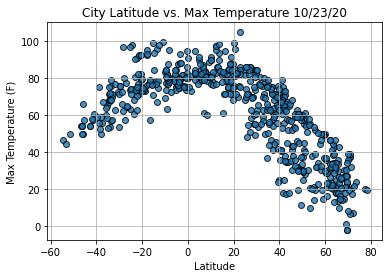

In [43]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

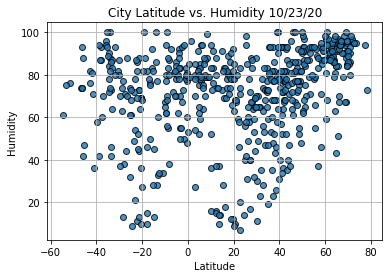

In [44]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

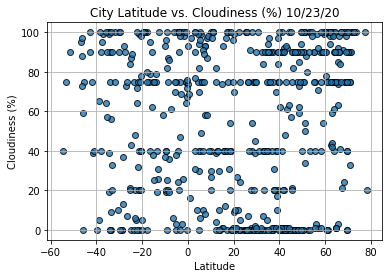

In [45]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

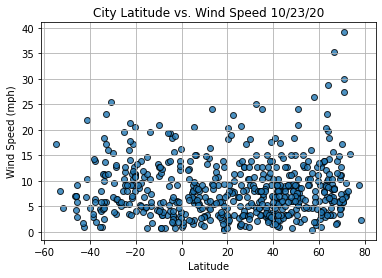

In [46]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [86]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
from scipy.stats import linregress
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [87]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.78,147.06,54.00,82,100,1.01,AU,2020-10-23 16:15:41
1,Rio Gallegos,-51.62,-69.22,50.00,76,90,4.70,AR,2020-10-23 16:15:41
2,Sola,-13.88,167.55,78.37,86,79,19.53,VU,2020-10-23 16:15:41
3,Warmbad,-28.45,18.73,97.11,13,37,3.47,NA,2020-10-23 16:15:42
4,Atuona,-9.80,-139.03,77.27,80,19,20.96,PF,2020-10-23 16:15:42
...,...,...,...,...,...,...,...,...,...
566,Natal,-5.79,-35.21,84.20,70,75,19.46,BR,2020-10-23 16:17:02
570,Mokobeng,-23.00,27.67,90.57,21,6,5.46,BW,2020-10-23 16:17:02
571,Bulawayo,-20.15,28.58,79.63,27,0,10.83,ZW,2020-10-23 16:17:02
573,Padang,-0.95,100.35,80.10,80,100,4.59,ID,2020-10-23 16:12:28


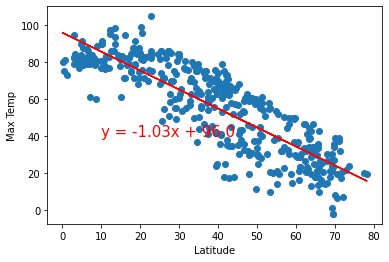

In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature''', 'Max Temp',(10,40))

                       
                        

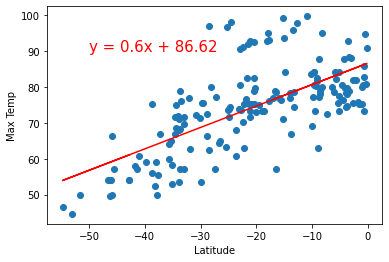

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere 
                       for Maximum Temperature''', 'Max Temp',(-50,90))
                       
                        

In [90]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.6x + 86.62
The r-value is: 0.675


In [91]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = -1.03x + 96.0
The r-value is: -0.855


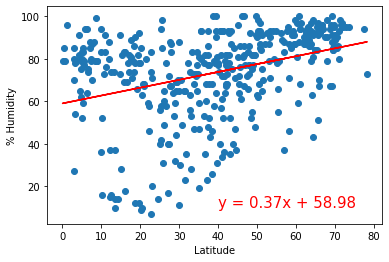

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for % Humidity''', '% Humidity',(40,10))

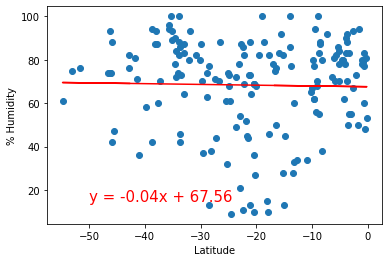

In [95]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(-50,15))
                    
                 

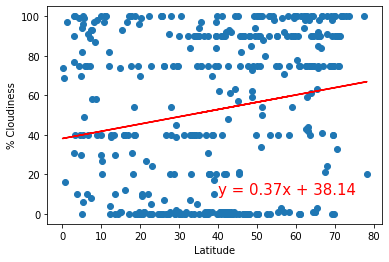

In [97]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for % Cloudiness''', '% Cloudiness',(40,10))

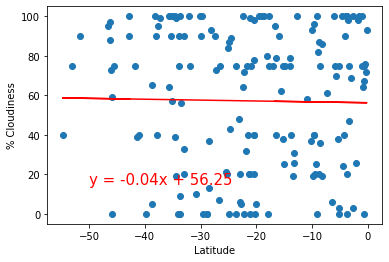

In [98]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(-50,15))
                    

In [99]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

y = 0.37x + 38.14
The r-value is: 0.188


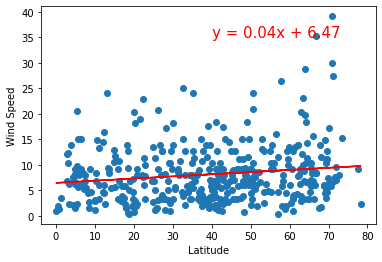

In [102]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for Wind Speed''', 'Wind Speed',(40,35))

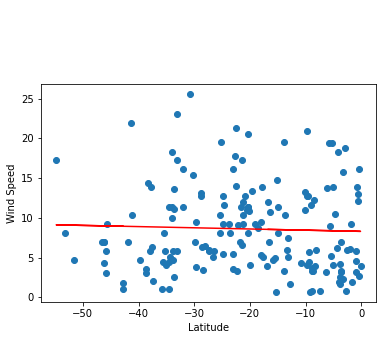

In [104]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for Wind Speed''', 'Wind Speed',(-50,35))